In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("articles.csv")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [43]:
df.head()

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"


In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
df['index_num']=le.fit_transform(df['index_code'])

In [63]:
df[['index_num','index_code']].head()

,index_num,index_code
0,0,A
1,0,A
2,0,A
3,1,B
4,1,B


In [5]:
df.shape

(105542, 25)

In [6]:
df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [89]:
df.duplicated().sum()

5271

In [ ]:
df.drop_duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [8]:
df.drop(columns=['detail_desc'],inplace=True)

In [14]:
df.drop(columns=['article_id'],inplace=True)

In [86]:
df.columns.tolist()

['product_code',
 'prod_name',
 'product_type_no',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_no',
 'graphical_appearance_name',
 'colour_group_code',
 'colour_group_name',
 'perceived_colour_value_id',
 'perceived_colour_value_name',
 'perceived_colour_master_id',
 'perceived_colour_master_name',
 'department_no',
 'department_name',
 'index_code',
 'index_name',
 'index_group_no',
 'index_group_name',
 'section_no',
 'section_name',
 'garment_group_no',
 'garment_group_name',
 'index_num']

In [79]:
df_cat=df[['prod_name','product_type_name','product_group_name','graphical_appearance_name','colour_group_name'
          ,'perceived_colour_value_name','perceived_colour_master_name','department_name','index_name',
          'index_group_name','section_name','garment_group_name']]

In [81]:
df_cat.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"


In [71]:
df_num=df[['product_type_no','graphical_appearance_no','colour_group_code','perceived_colour_value_id'
         ,'index_num','perceived_colour_master_id','department_no','index_group_no','section_no','garment_group_no']]

In [73]:
df_num.head()

,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,index_num,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
0,253,1010016,9,4,0,5,1676,1,16,1002
1,253,1010016,10,3,0,9,1676,1,16,1002
2,253,1010017,11,1,0,9,1676,1,16,1002
3,306,1010016,9,4,1,5,1339,1,61,1017
4,306,1010016,10,3,1,9,1339,1,61,1017


In [74]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   product_type_no             105542 non-null  int64
 1   graphical_appearance_no     105542 non-null  int64
 2   colour_group_code           105542 non-null  int64
 3   perceived_colour_value_id   105542 non-null  int64
 4   index_num                   105542 non-null  int32
 5   perceived_colour_master_id  105542 non-null  int64
 6   department_no               105542 non-null  int64
 7   index_group_no              105542 non-null  int64
 8   section_no                  105542 non-null  int64
 9   garment_group_no            105542 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 7.6 MB


In [34]:
df.groupby('product_type_name')['product_type_no'].count().reset_index()

,product_type_name,product_type_no
0,Accessories set,7
1,Alice band,6
2,Baby Bib,3
3,Backpack,6
4,Bag,1280
5,Ballerinas,372
6,Beanie,56
7,Belt,458
8,Bikini top,850
9,Blanket,1


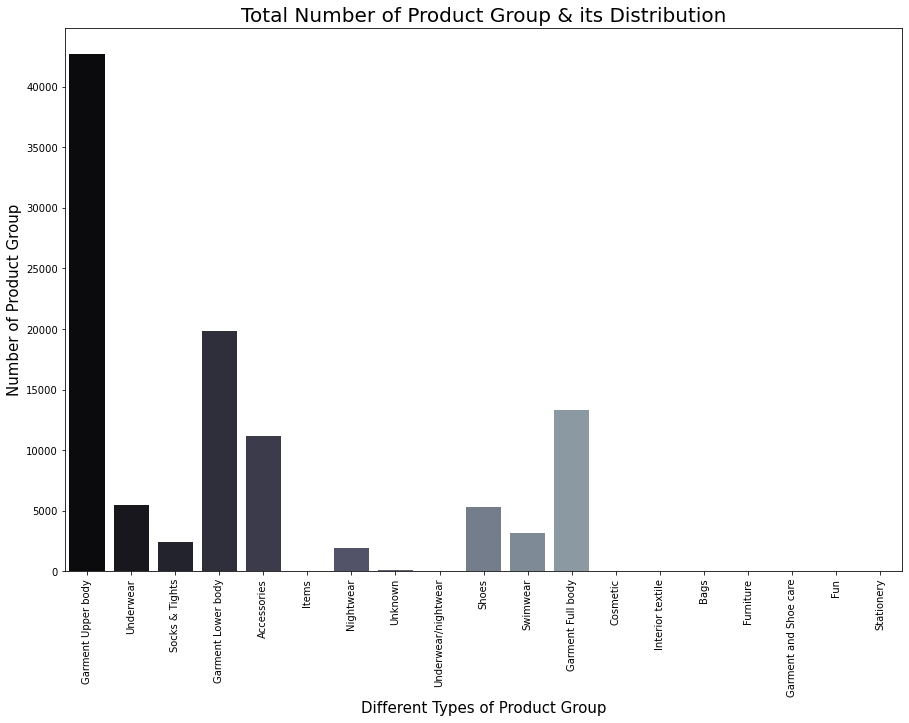

In [53]:
plt.subplots(figsize=(15,10))

ax=sns.countplot("product_group_name",data=df,palette='bone')
ax.set_xlabel(xlabel='Different Types of Product Group',fontsize=15)
ax.set_ylabel(ylabel='Number of Product Group',fontsize=15)
ax.set_title(label='Total Number of Product Group & its Distribution',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

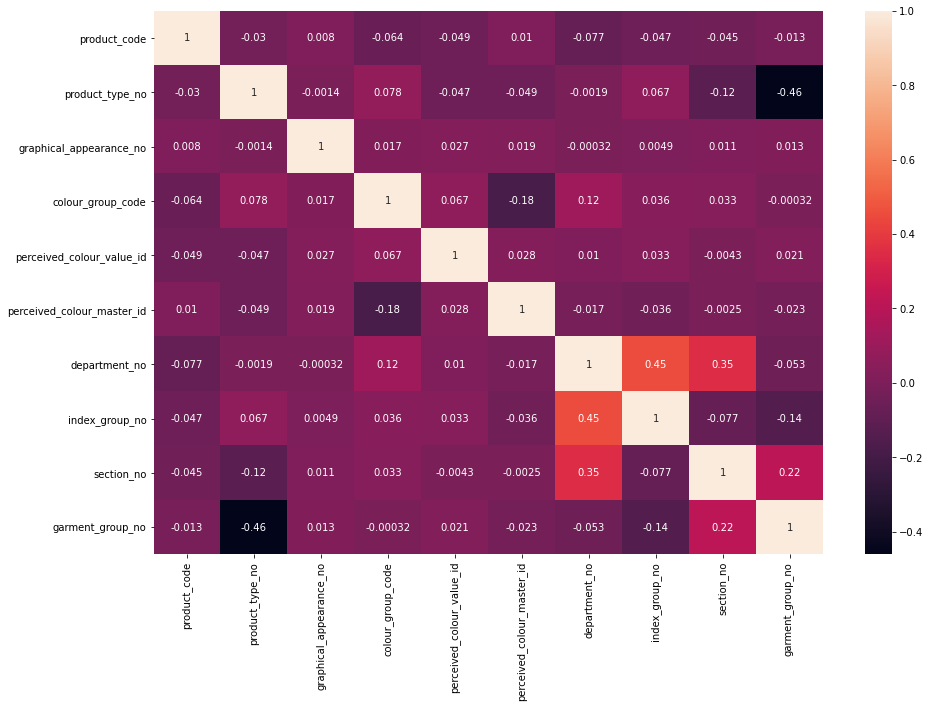

In [15]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
from wordcloud import WordCloud 

(-0.5, 1919.5, 1079.5, -0.5)

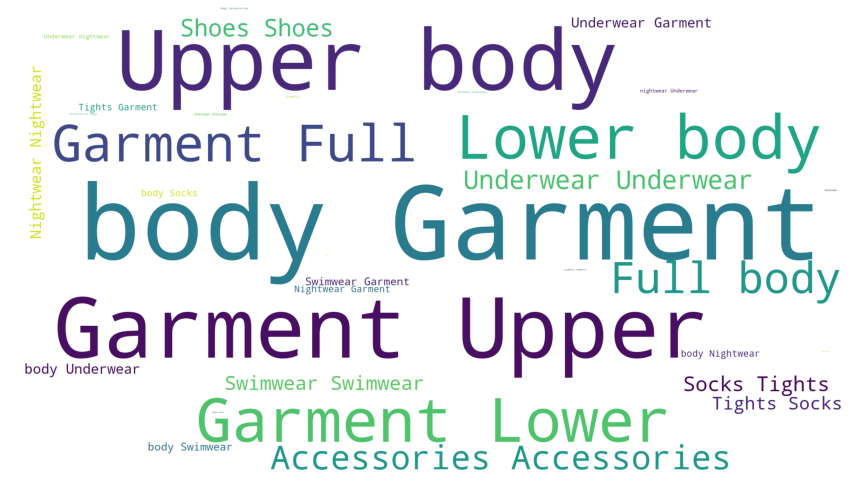

In [37]:
wc=WordCloud(height=1080,width=1920,background_color='white')
wc.generate(" ".join(df.product_group_name))
plt.subplots(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")

(-0.5, 1919.5, 1079.5, -0.5)

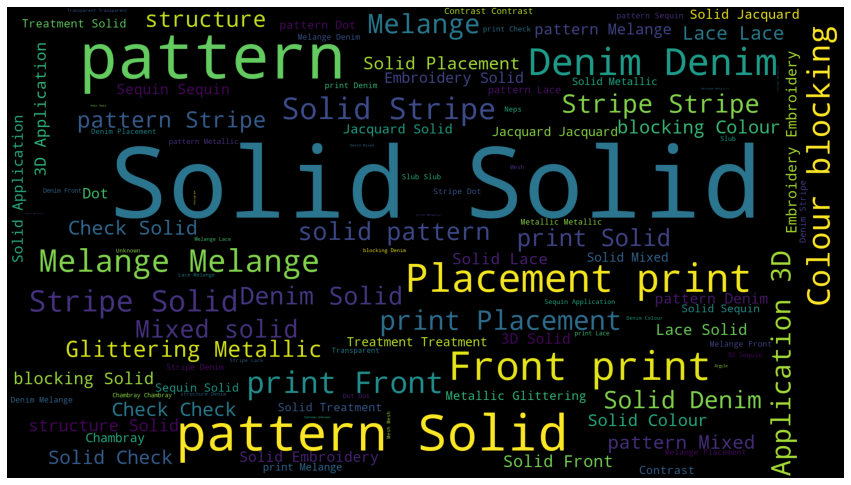

In [57]:
wc=WordCloud(height=1080,width=1920,background_color='black')
wc.generate(" ".join(df.graphical_appearance_name))
plt.subplots(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")

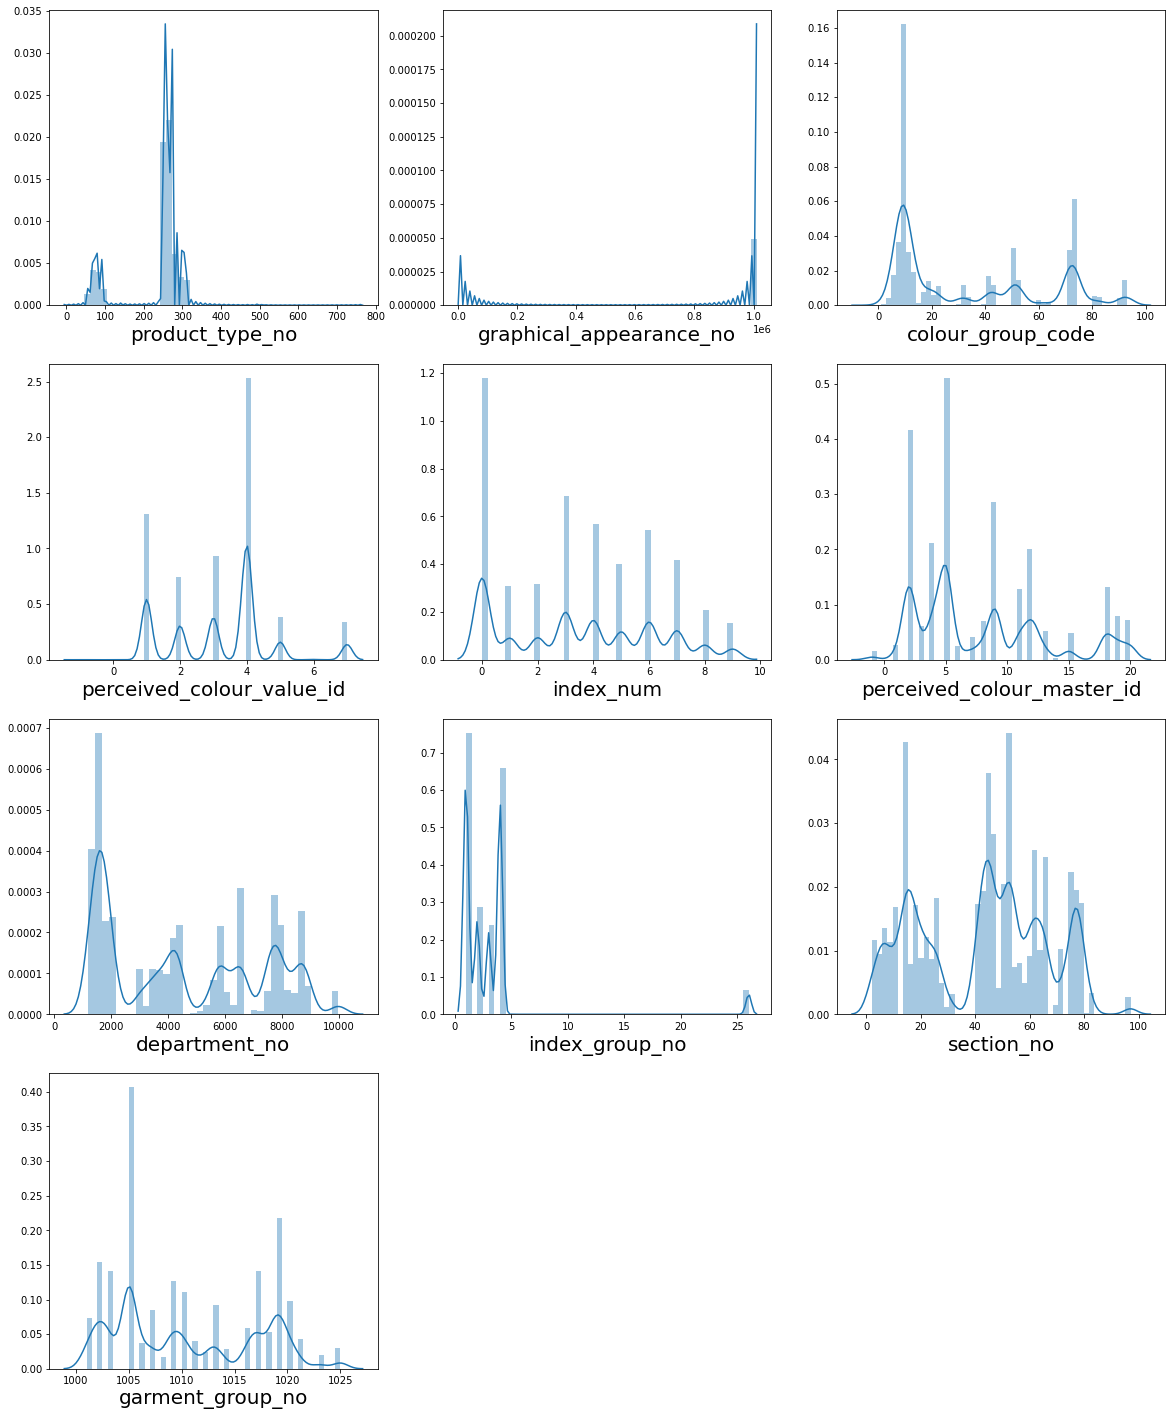

In [78]:
plt.figure(figsize=(20,25))
var=1
for i in df_num:
    if var <= 12:
        ax=plt.subplot(4,3,var)
        sns.distplot(df_num[i])
        plt.xlabel(i,fontsize=20)
    var+=1
plt.show()